In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore, loguniform
from scipy.stats.mstats import winsorize
# Preprocessing
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, OneHotEncoder, MultiLabelBinarizer, OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
    
# Metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score
#pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [3]:
print(df.info())
print("---------------------------------------")
print("the shape of the dataet is", df.shape)
print("---------------------------------------")
print("Missing values")
print(df.isnull().sum())
print("there are", df.duplicated().sum(), "duplicates in the dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB
None
---------------------------------------
the shape of the dataet is (2976, 9)
---------------------------------------
Missing values
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traf

In [4]:
# checking for their unique values and value count to know my dataset
unique = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique.append(x)
unique =pd.DataFrame(unique,columns=['Unique Number'], index=df.columns)
unique

,Unique Number
Time,96
Date,31
Day of the week,7
CarCount,172
BikeCount,71
BusCount,51
TruckCount,41
Total,239
Traffic Situation,4


In [5]:
for col in list (df.columns):
    print("\nfor columns:", col, "\n")
    print(df[col].value_counts())


for columns: Time 

Time
12:00:00 AM    31
12:15:00 AM    31
5:30:00 PM     31
5:15:00 PM     31
5:00:00 PM     31
               ..
7:15:00 AM     31
7:00:00 AM     31
6:45:00 AM     31
6:30:00 AM     31
11:45:00 PM    31
Name: count, Length: 96, dtype: int64

for columns: Date 

Date
10    96
26    96
8     96
7     96
6     96
5     96
4     96
3     96
2     96
1     96
31    96
30    96
29    96
28    96
27    96
25    96
11    96
24    96
23    96
22    96
21    96
20    96
19    96
18    96
17    96
16    96
15    96
14    96
13    96
12    96
9     96
Name: count, dtype: int64

for columns: Day of the week 

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

for columns: CarCount 

CarCount
18     110
19      83
15      81
20      75
14      73
      ... 
167      1
154      1
152      1
155      1
163      1
Name: count, Length: 172, dtype: int64

for columns: BikeCo

In [6]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [7]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

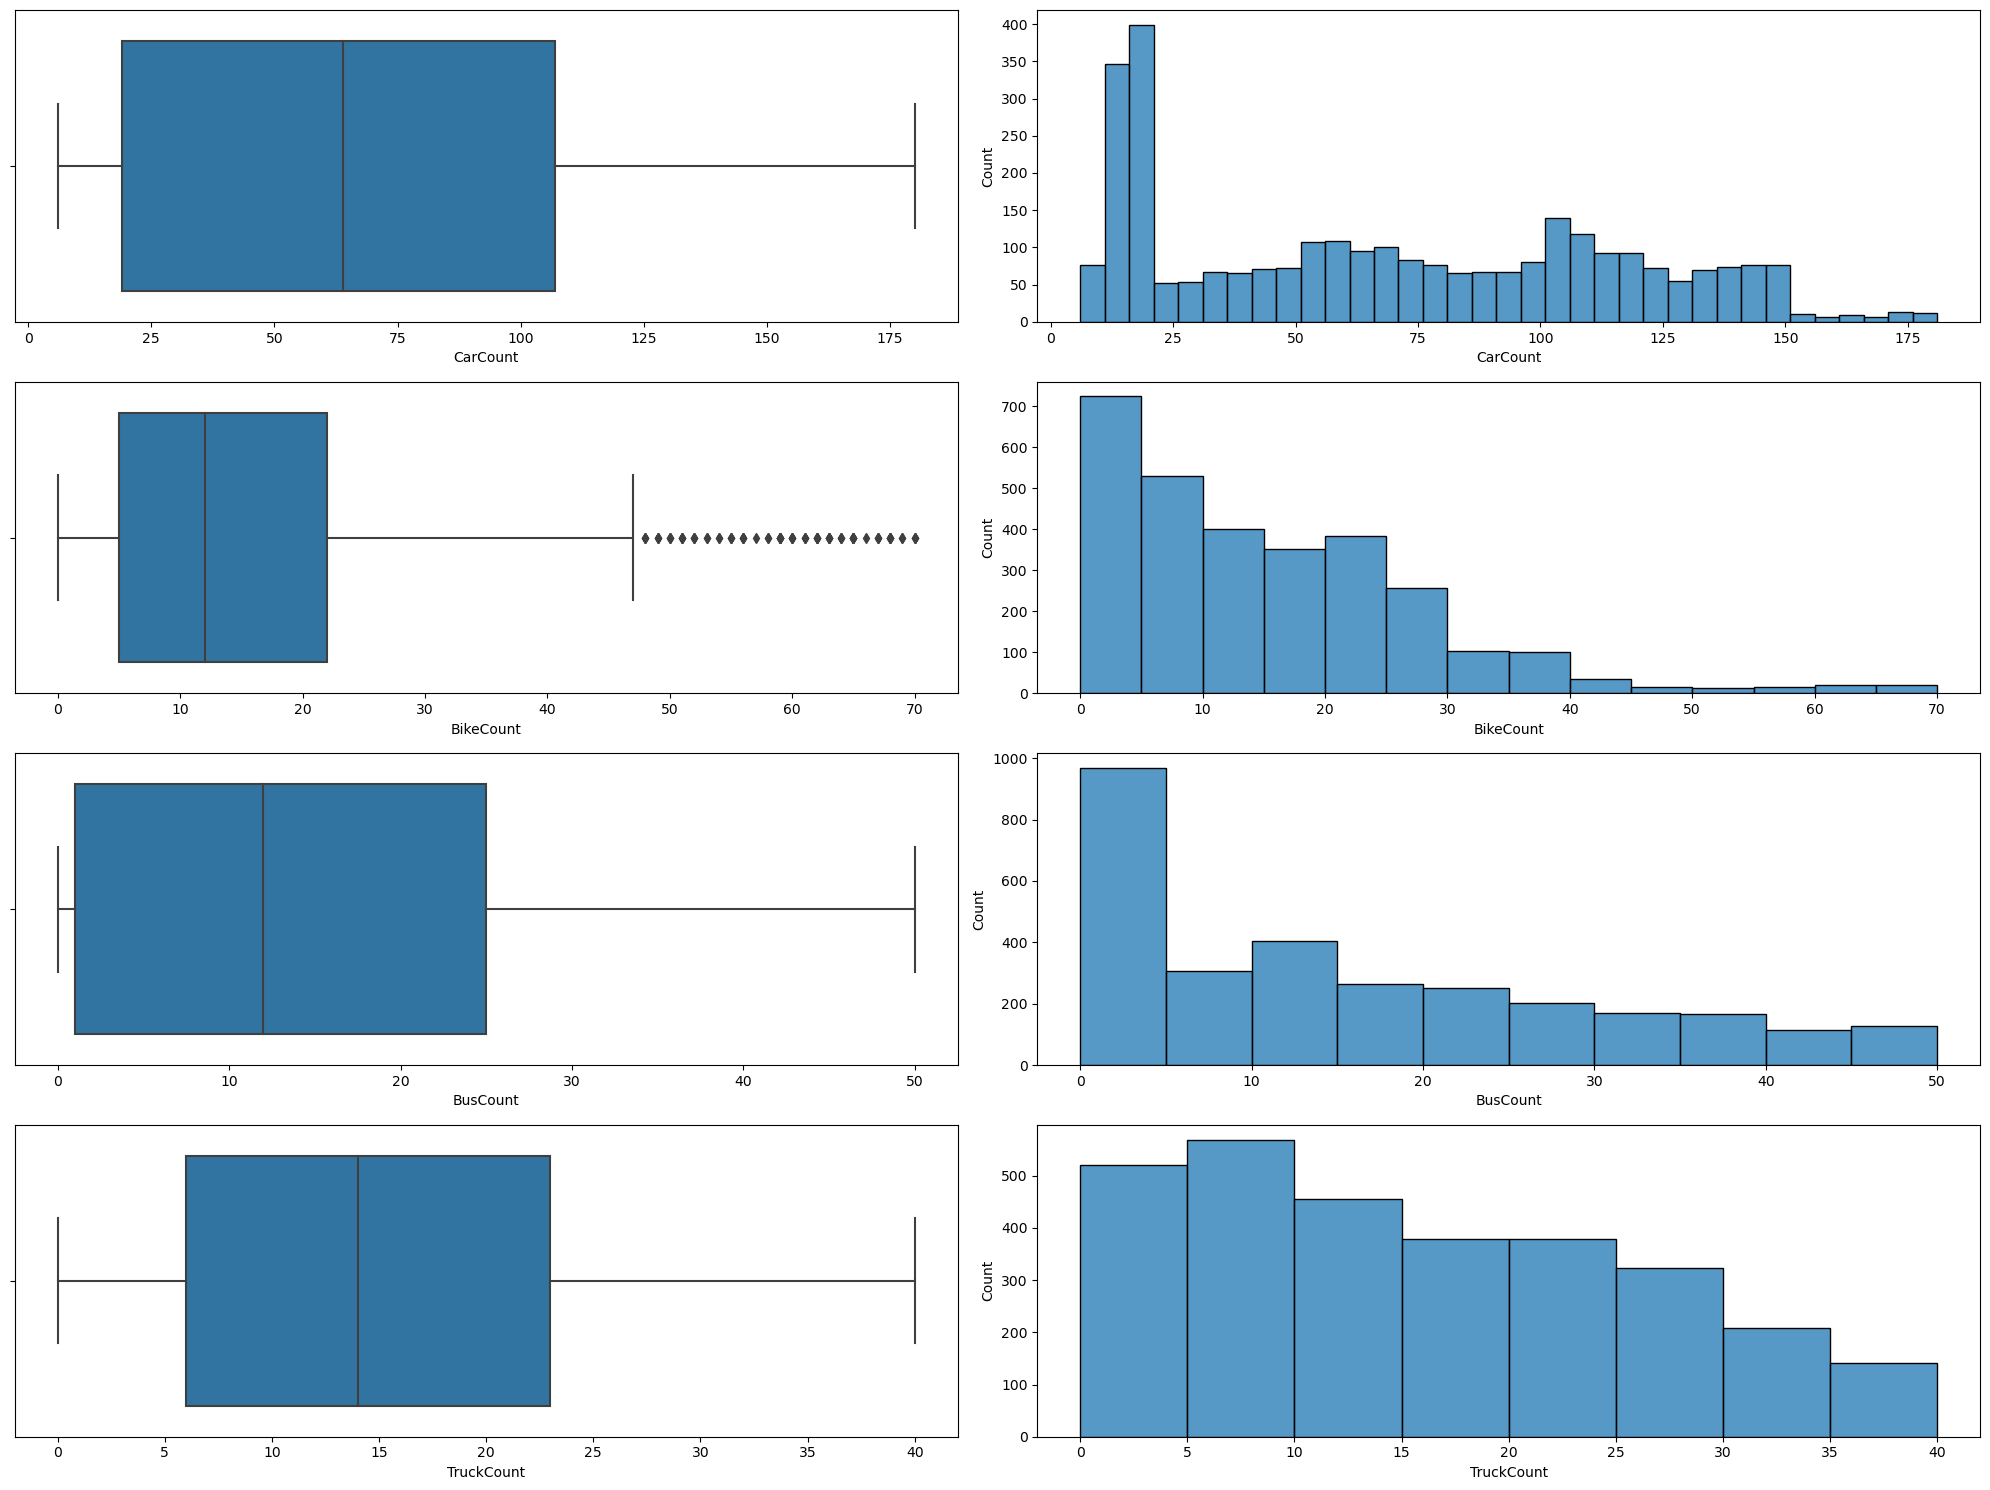

In [8]:
fig, axes = plt.subplots(4,2, figsize=(20,15))
a = 0;
b = 0;
count= ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
for col in count:
    ax = sns.boxplot(x=df[col], ax=axes[a][b])
    b += 1
    ax = sns.histplot(df, x=col, binwidth = 5,ax=axes[a][b])
    a += 1
    b -= 1
plt.tight_layout()

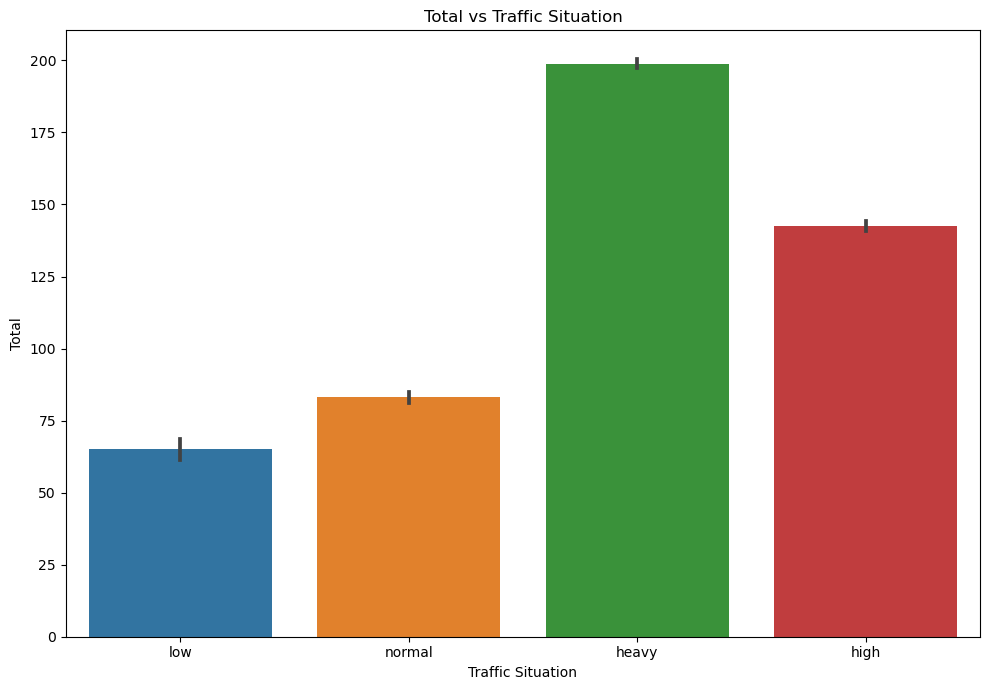

In [9]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Traffic Situation', y='Total')
plt.title("Total vs Traffic Situation")
plt.tight_layout()
plt.show()

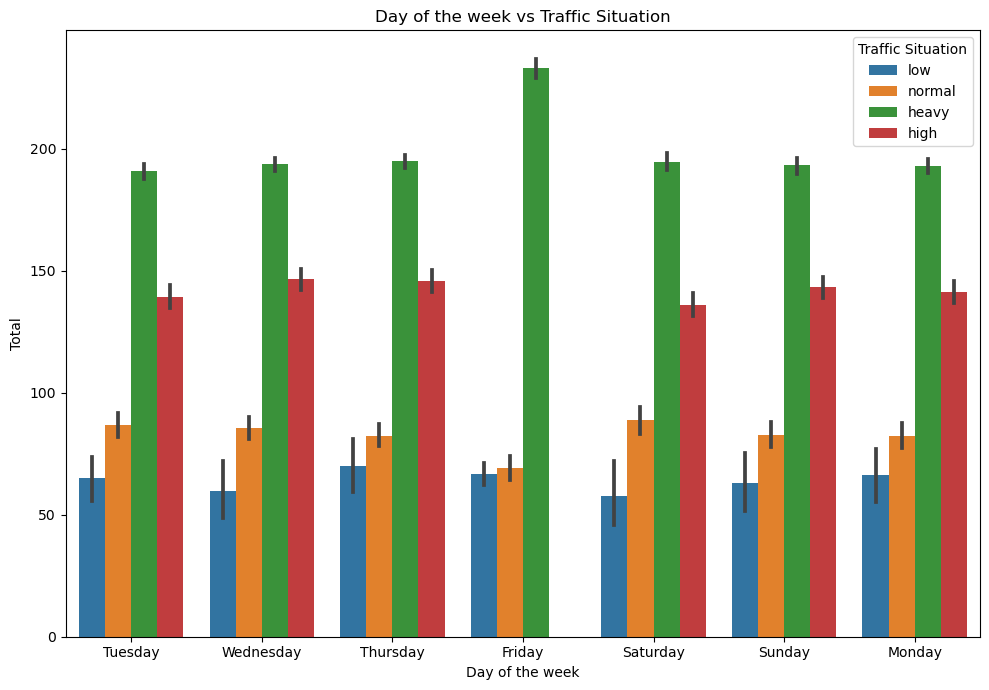

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Day of the week', y='Total', hue='Traffic Situation')
plt.title("Day of the week vs Traffic Situation")
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [12]:
df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute 


In [13]:
df['day'] = df['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
df['AM/PM'] = df['day'].replace({'AM':0,'PM':1})

In [14]:
df.drop(["Time", "day"], axis=1, inplace=True)
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0


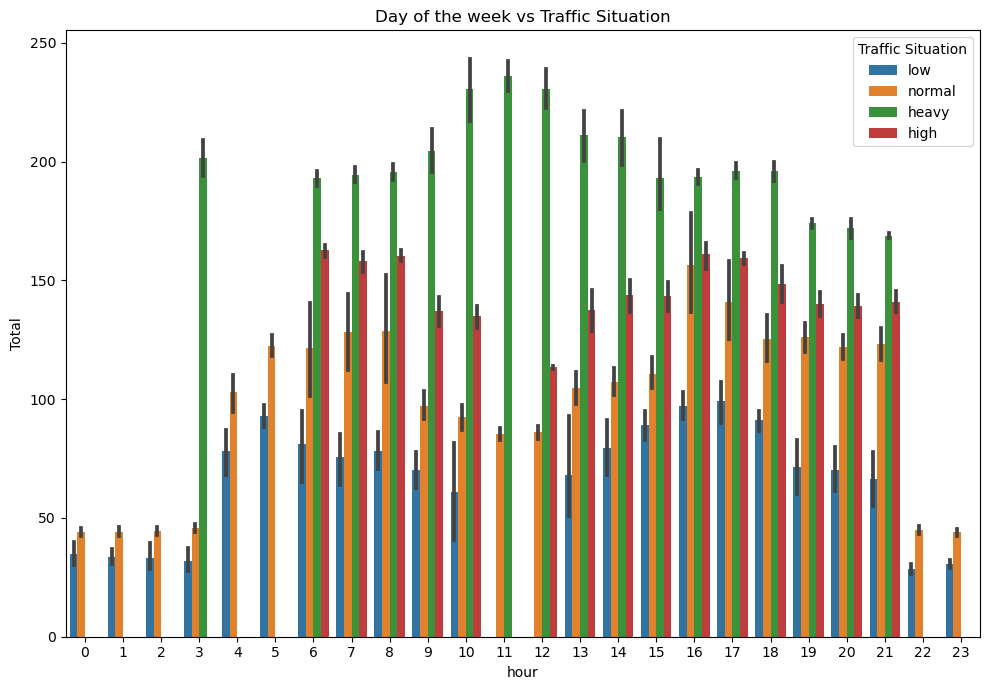

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='hour', y='Total', hue='Traffic Situation')
plt.title("Day of the week vs Traffic Situation")
plt.tight_layout()
plt.show()

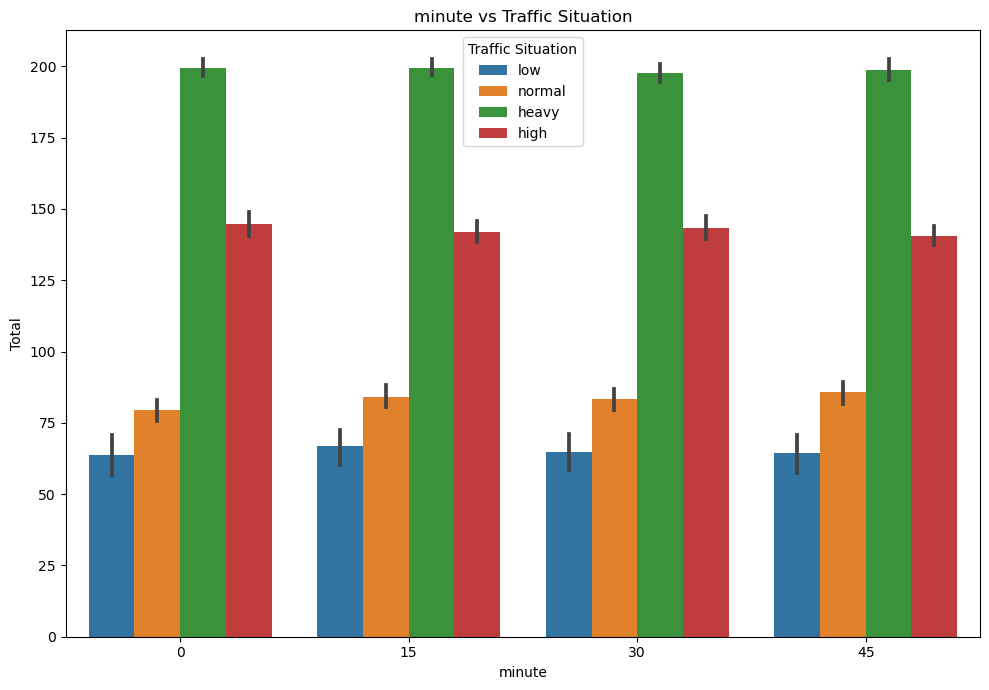

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='minute', y='Total', hue='Traffic Situation')
plt.title("minute vs Traffic Situation")
plt.tight_layout()
plt.show()

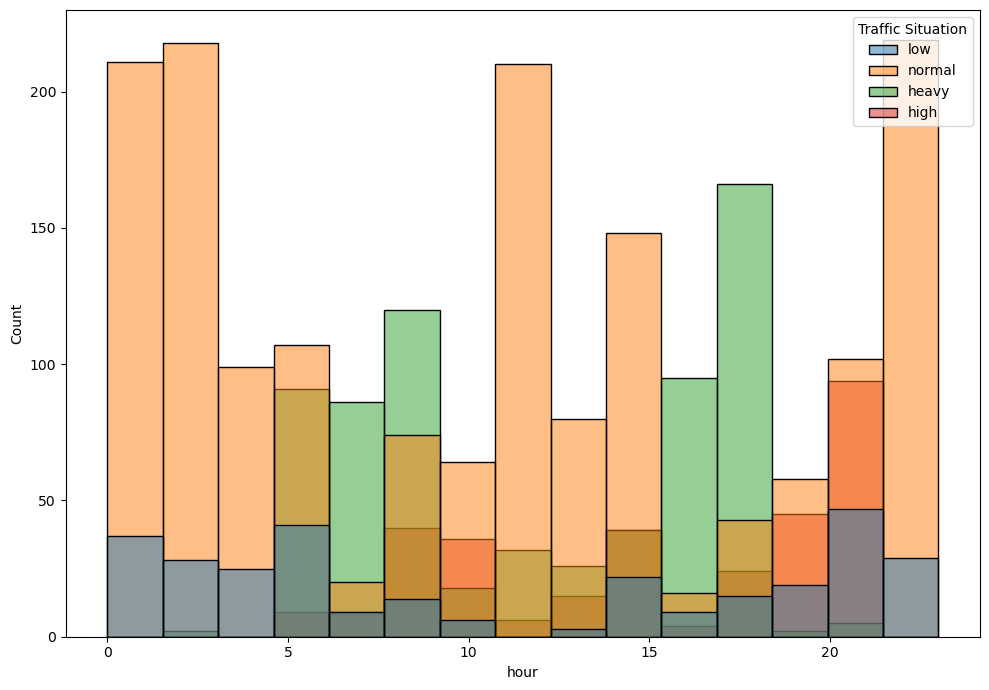

In [17]:
# Group the data by hour and sum the counts
hours = df.groupby("hour")[["CarCount", "BikeCount", "BusCount", "TruckCount"]].sum()
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='hour', hue='Traffic Situation')
plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

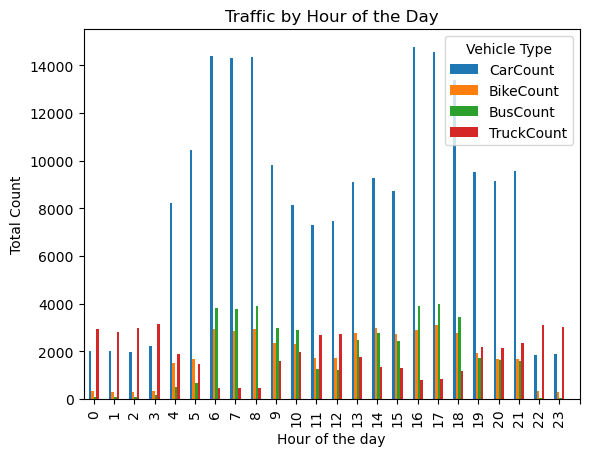

In [18]:
# Plotting
plt.figure(figsize=(20,20))
hours.plot(kind="bar")
plt.xlabel("Hour of the day")
plt.ylabel("Total Count")
plt.title("Traffic by Hour of the Day")
plt.legend(title="Vehicle Type",loc="upper right")
plt.xticks(range(25))
plt.show()

#Converting Days of weak into Numeric form
df['Day of the week']=df['Day of the week'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})
df['Traffic Situation']=df['Traffic Situation'].replace({'low':0, 'normal':1, 'high':2, 'heavy':3})
df.head()

# PreProcessing

### Dealing with Outliers

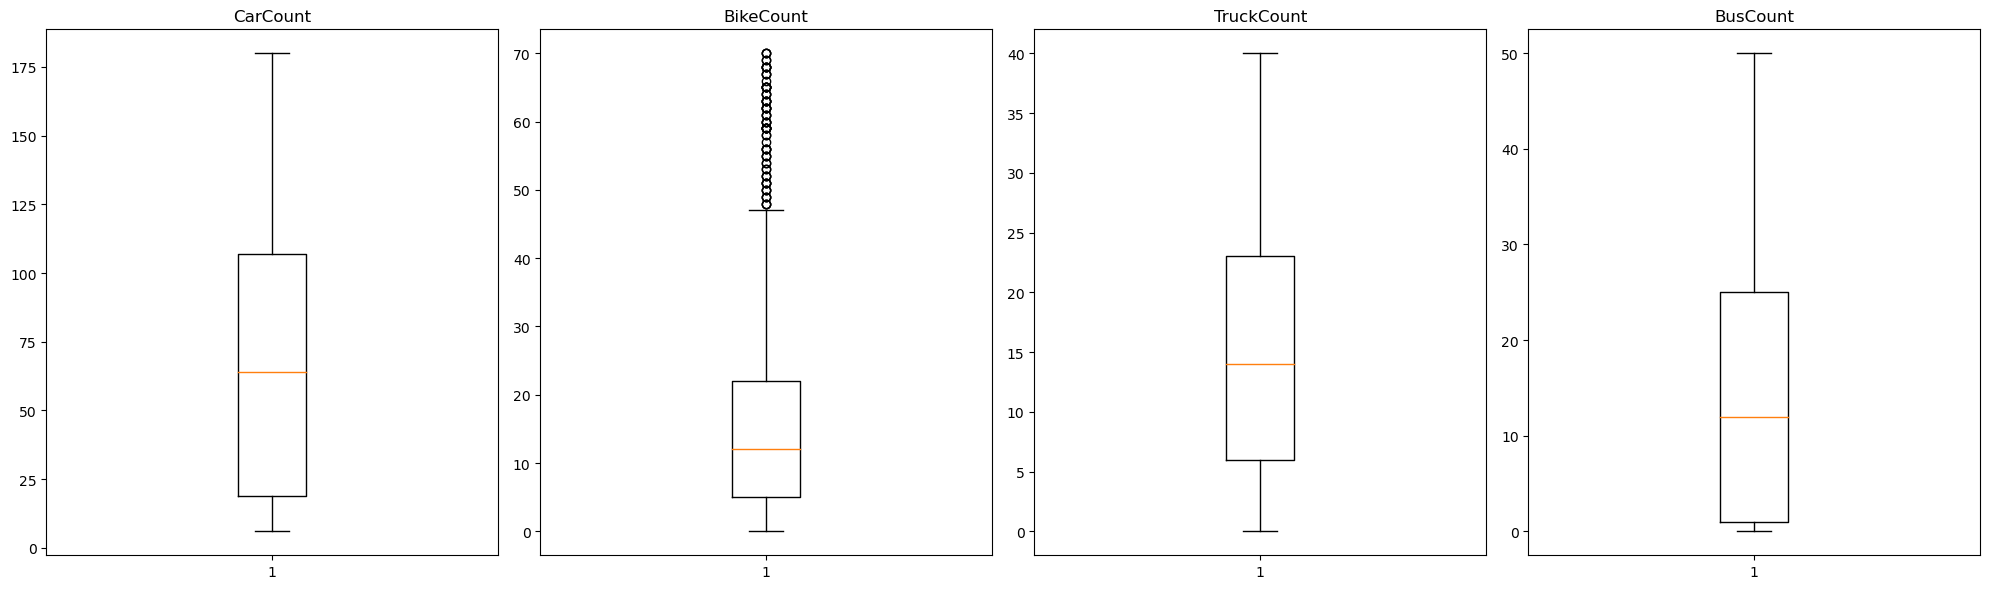

In [19]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,6))


ax1.boxplot(df['CarCount'])
ax1.set_title('CarCount')

ax2.boxplot(df['BikeCount'])
ax2.set_title('BikeCount')

ax3.boxplot(df['TruckCount'])
ax3.set_title('TruckCount')

ax4.boxplot(df['BusCount'])
ax4.set_title('BusCount')




plt.tight_layout()

plt.show()

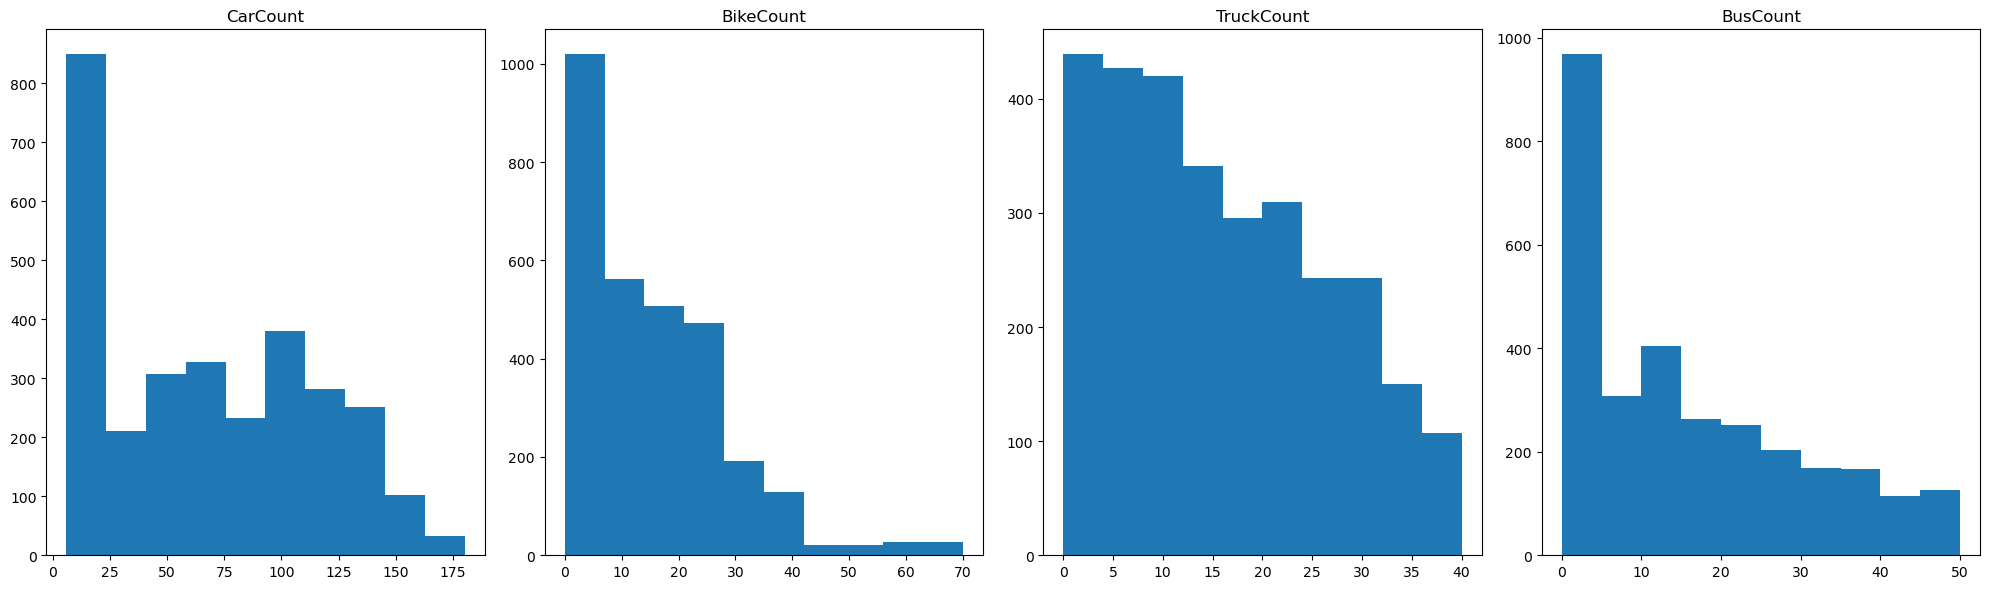

In [20]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,6))


ax1.hist(df['CarCount'])
ax1.set_title('CarCount')

ax2.hist(df['BikeCount'])
ax2.set_title('BikeCount')

ax3.hist(df['TruckCount'])
ax3.set_title('TruckCount')

ax4.hist(df['BusCount'])
ax4.set_title('BusCount')



plt.tight_layout()

plt.show()

In [21]:
bikecount_zscore= zscore(df['BikeCount'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(bikecount_zscore>threshold)[0])))
    print('--------------')


Threshold Value: 1
Number of Outliers: 414
--------------
Threshold Value: 2
Number of Outliers: 96
--------------
Threshold Value: 3
Number of Outliers: 59
--------------


In [22]:
df[bikecount_zscore>2].BikeCount.min()

41

In [23]:
df[df['BikeCount']<41].BikeCount.max()

40

In [24]:
bikecount_win_percentile=stats.percentileofscore(df['BikeCount'],40)/100
print(bikecount_win_percentile)

0.9635416666666665


In [25]:
1-bikecount_win_percentile

0.03645833333333348

In [26]:
bikecount_win=winsorize(df.BikeCount,(0, (1-bikecount_win_percentile)))

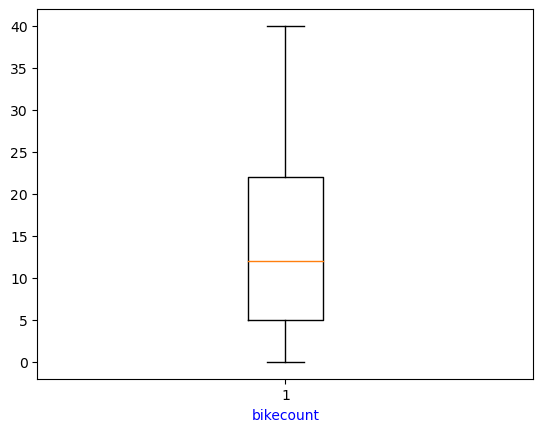

In [27]:
plt.boxplot(bikecount_win)
plt.xlabel('bikecount',color='b')
plt.show()

In [28]:
df['Bike_Count']=bikecount_win

In [29]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM,Bike_Count
0,10,Tuesday,31,0,4,4,39,low,0,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0,6


In [30]:
df.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM',
       'Bike_Count'],
      dtype='object')

In [31]:
df_copy=df.copy()

In [32]:
df_copy.drop(['BikeCount', 'Total', 'hour', 'minute', 'AM/PM'], axis=1, inplace=True)

In [33]:
df_copy.head()

,Date,Day of the week,CarCount,BusCount,TruckCount,Traffic Situation,Bike_Count
0,10,Tuesday,31,4,4,low,0
1,10,Tuesday,49,3,3,low,0
2,10,Tuesday,46,3,6,low,0
3,10,Tuesday,51,2,5,low,0
4,10,Tuesday,57,15,16,normal,6


## Scaling

In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler

# Assuming 'df_copy' contains your dataset and 'target_column' is your target variable
X = df_copy.drop(columns=['Traffic Situation'])
y = df_copy['Traffic Situation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the features of the entire dataset before splitting
X_combined = pd.concat([X_train, X_test], axis=0)

# Combine the target variable of the entire dataset before splitting
y_combined = pd.concat([y_train, y_test], axis=0)

# Use OrdinalEncoder for categorical columns in independent variables
ordinal = OrdinalEncoder()
X_combined_encoded = ordinal.fit_transform(X_combined)

# Split the combined dataset back into training and testing sets
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Use LabelEncoder for encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert 'EDEMA' column into dummy variables
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Convert back to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Convert back to DataFrame


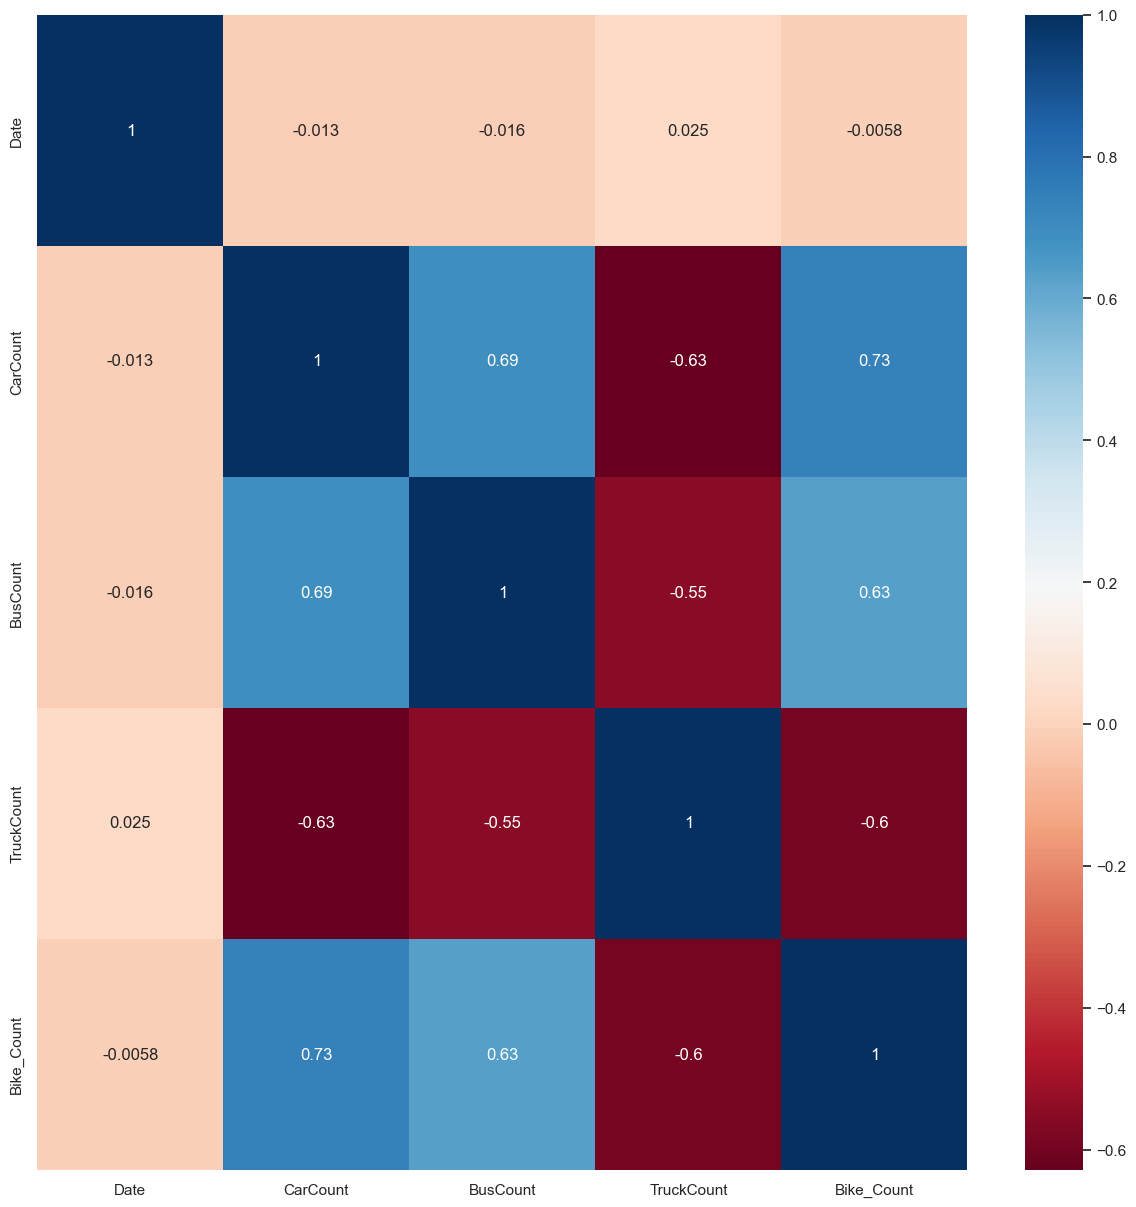

[]

In [35]:
def high_correlated_cols(df_copy, plot=False, corr_th=0.80):
    # Select only the numeric columns from the DataFrame
    numeric_dataframe = df_copy.select_dtypes(include=['number'])
    
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    
    return list

# Usage example:
high_correlated_cols(df_copy, plot=True)

import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train_scaled and y_train_encoded are your training features and labels

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 2, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-5, 10.0),
        'random_strength': trial.suggest_uniform('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
    }

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_scaled, y_train_encoded, test_size=0.2, random_state=42
    )

    train_data = Pool(data=X_train, label=y_train)
    valid_data = Pool(data=X_valid, label=y_valid)

    model = CatBoostClassifier(**params, loss_function='MultiClass', eval_metric='MultiClass', verbose=False)
    model.fit(train_data, eval_set=[valid_data], early_stopping_rounds=50)

    y_pred_valid = model.predict_proba(X_valid)
    score = log_loss(y_valid, y_pred_valid)

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

# Train the final model on the entire training set with the best hyperparameters
best_params = trial.params
final_model = CatBoostClassifier(**best_params, loss_function='MultiClass', eval_metric='MultiClass', verbose=False)
final_model.fit(X_train_scaled, y_train_encoded)

# Generate predictions on the test set
final_proba_predictions = final_model.predict_proba(X_test_scaled)

# If needed, format predictions for submission
# ...

# Evaluation on the final test set
final_accuracy = accuracy_score(y_test_encoded, final_model.predict(X_test_scaled))
final_f1 = f1_score(y_test_encoded, final_model.predict(X_test_scaled), average='weighted')
final_logloss = -log_loss(y_test_encoded, final_proba_predictions)

print("\nFinal Model Evaluation on Testing Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1 Score: {final_f1:.4f}")
print(f"Log Loss: {final_logloss:.4f}")


In [36]:
# Assuming 'y_train' is your target variable
num_classes = len(set(y_train))
print(f"Number of unique classes: {num_classes}")

if num_classes == 2:
    print("Your problem is a binary classification problem.")
else:
    print("Your problem may not be a binary classification problem.")


Number of unique classes: 4
Your problem may not be a binary classification problem.


In [37]:
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [38]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Assuming X_train_scaled and y_train_encoded are your training features and labels
# Assuming X_test_scaled and y_test_encoded are your testing features and labels

# Define models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBoost': XGBClassifier(), 
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')  # Set logging_level to avoid CatBoost verbosity
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'log_loss': make_scorer(log_loss, needs_proba=True)
}

# Evaluate models using cross-validation for multi-class classification
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, n_jobs=-1, scoring='accuracy')
    
    results[model_name] = {
        'Accuracy': scores[0].mean(),
        'F1 Score': scores[1].mean(),
        'Precision Macro': scores[2].mean(),
        'Recall Macro': scores[3].mean(),
        'Log Loss': -scores[4].mean()  # Convert log_loss to positive for ranking
    }

# Create a summary table
summary_table = pd.DataFrame(results).transpose().sort_values(by='Accuracy', ascending=False)

# Display the summary table
print("\nSummary Table:")
print(summary_table)

# Train the best model on the full training set (you can choose the best based on your criteria)
best_model_name = summary_table.index[0]
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

# Evaluate the best model on the testing set
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
precision_macro = precision_score(y_test_encoded, y_pred, average='macro')
recall_macro = recall_score(y_test_encoded, y_pred, average='macro')
logloss = -log_loss(y_test_encoded, y_pred_proba)

print(f"\nBest Model ({best_model_name}) Evaluation on Testing Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision Macro: {precision_macro:.4f}")
print(f"Recall Macro: {recall_macro:.4f}")
print(f"Log Loss: {logloss:.4f}")


Evaluating DecisionTree...
Evaluating RandomForest...
Evaluating LogisticRegression...
Evaluating XGBoost...
Evaluating LightGBM...
Evaluating CatBoost...

Summary Table:
                    Accuracy  F1 Score  Precision Macro  Recall Macro  \
CatBoost            0.976891  0.974790         0.970588      0.962185   
LightGBM            0.972689  0.966387         0.964286      0.962185   
RandomForest        0.968487  0.962185         0.962185      0.964286   
XGBoost             0.968487  0.968487         0.966387      0.972689   
DecisionTree        0.945378  0.939076         0.928571      0.922269   
LogisticRegression  0.846639  0.846639         0.855042      0.838235   

                    Log Loss  
CatBoost           -0.968487  
LightGBM           -0.960084  
RandomForest       -0.955882  
XGBoost            -0.962185  
DecisionTree       -0.934874  
LogisticRegression -0.836134  

Best Model (CatBoost) Evaluation on Testing Set:
Accuracy: 0.9648
F1 Score: 0.9647
Precision Macro:

In [39]:
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming X_train_scaled and y_train_encoded are your training features and labels

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 2, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-5, 10.0),
        'random_strength': trial.suggest_uniform('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
    }

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_scaled, y_train_encoded, test_size=0.2, random_state=42
    )

    train_data = Pool(data=X_train, label=y_train)
    valid_data = Pool(data=X_valid, label=y_valid)

    model = CatBoostClassifier(**params, loss_function='MultiClass', eval_metric='MultiClass', verbose=False)
    model.fit(train_data, eval_set=[valid_data], early_stopping_rounds=50)

    y_pred_valid = model.predict_proba(X_valid)
    score = log_loss(y_valid, y_pred_valid)

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

# Train the final model on the entire training set with the best hyperparameters
best_params = trial.params
final_model = CatBoostClassifier(**best_params, loss_function='MultiClass', eval_metric='MultiClass', verbose=False)
final_model.fit(X_train_scaled, y_train_encoded)

# Generate predictions on the test set
final_proba_predictions = final_model.predict_proba(X_test_scaled)

# If needed, format predictions for submission
# ...

# Evaluation on the final test set
final_accuracy = accuracy_score(y_test_encoded, final_model.predict(X_test_scaled))
final_f1_macro = f1_score(y_test_encoded, final_model.predict(X_test_scaled), average='macro')
final_precision_macro = precision_score(y_test_encoded, final_model.predict(X_test_scaled), average='macro')
final_recall_macro = recall_score(y_test_encoded, final_model.predict(X_test_scaled), average='macro')
final_logloss = -log_loss(y_test_encoded, final_proba_predictions)

print("\nFinal Model Evaluation on Testing Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1 Macro: {final_f1_macro:.4f}")
print(f"Precision Macro: {final_precision_macro:.4f}")
print(f"Recall Macro: {final_recall_macro:.4f}")
print(f"Log Loss: {final_logloss:.4f}")


[I 2024-01-22 10:57:03,751] A new study created in memory with name: no-name-f80e91ef-8a38-4994-aeda-9c887c90cd40
[I 2024-01-22 10:57:05,434] Trial 3 finished with value: 0.12190277737722813 and parameters: {'iterations': 366, 'depth': 4, 'learning_rate': 0.07857013895824796, 'bagging_temperature': 0.0005070632763563156, 'random_strength': 0.773403350036949, 'border_count': 146, 'l2_leaf_reg': 0.8738729398127134}. Best is trial 3 with value: 0.12190277737722813.
[I 2024-01-22 10:57:06,338] Trial 0 finished with value: 0.20352202827938076 and parameters: {'iterations': 581, 'depth': 4, 'learning_rate': 0.008772988111152546, 'bagging_temperature': 0.001376763986593367, 'random_strength': 0.4302544453942557, 'border_count': 49, 'l2_leaf_reg': 3.8718430002585595}. Best is trial 3 with value: 0.12190277737722813.
[I 2024-01-22 10:57:06,562] Trial 4 finished with value: 0.5364423171540652 and parameters: {'iterations': 349, 'depth': 2, 'learning_rate': 0.005440641287727923, 'bagging_temperat

Number of finished trials: 100
Best trial:
Value: 0.11099453523120478
Params: 
iterations: 519
depth: 6
learning_rate: 0.05072170900761834
bagging_temperature: 0.003121529626733217
random_strength: 0.41834003123554436
border_count: 143
l2_leaf_reg: 0.22411787663101704

Final Model Evaluation on Testing Set:
Accuracy: 0.9698
F1 Macro: 0.9629
Precision Macro: 0.9628
Recall Macro: 0.9634
Log Loss: -0.0994


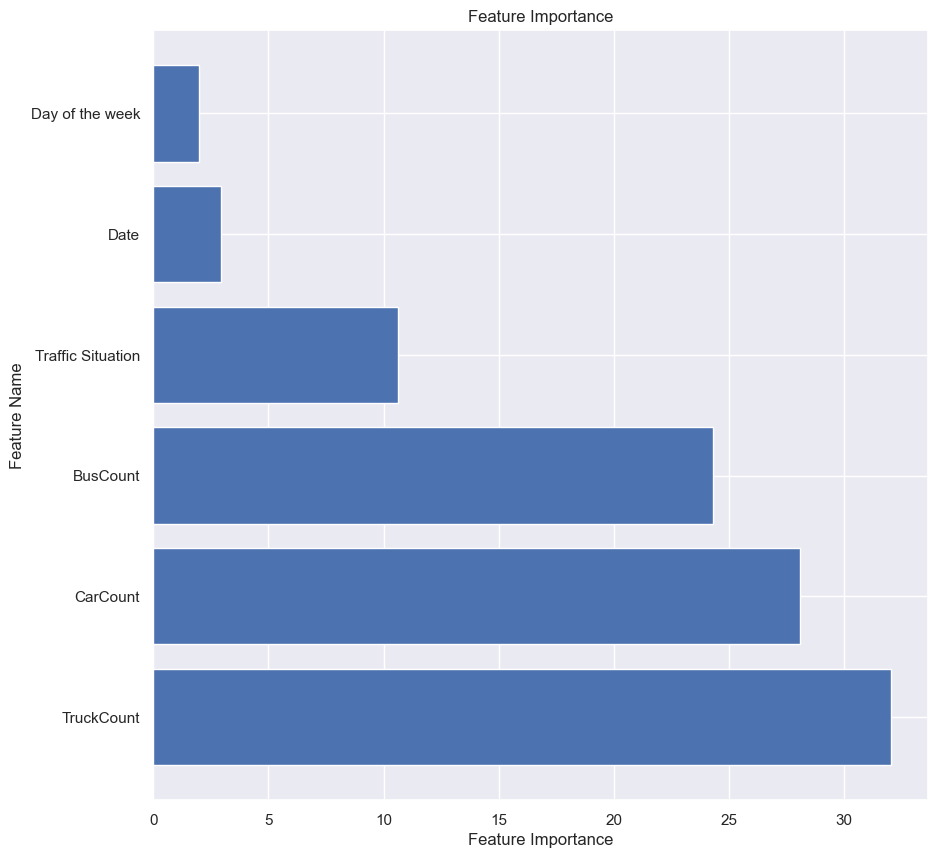

In [42]:

feature_importances = final_model.feature_importances_
feature_names = df_copy.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()